In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [5]:

data = pd.read_csv('C:\\Users\\Admin\\Desktop\\FILES\\AKPROJECTS\\CreditCradFraud\\Credit_Card_Applications.csv')

data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
# splitting the data into dependent and independent variables

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print(X.shape)
print(y.shape)

(690, 15)
(690,)


In [7]:
data.isnull().any().any()

False

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [10]:
data.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [11]:

# feature scaling

from sklearn.preprocessing import MinMaxScaler

# creating a scaler function
mm = MinMaxScaler(feature_range = (-1, 1))
# Transform features by scaling each feature to a given range.

# This estimator scales and translates 
# each feature individually such that it is in the given range on the training set, e.g. between zero and one.
#  feeding the independent variable into the scaler function
X = mm.fit_transform(X)

X.shape

(690, 15)

MiniSom is a minimalistic Numpy-based implementation of self-organizing maps. 
MiniSom can be installed using the Python package management utility pip.


In [9]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.7-py3-none-any.whl size=8607 sha256=8049fd5c321c11df5da88b0a6d15070a2a179494c32adf2975a257cea66cb8d9
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\79\b7\32\59084846a1974ce111b588f8545249d5c841d970b4312ecc86
Successfully built minisom


In [12]:
# training the SOM

from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [13]:
som

In [14]:
som.random_weights_init(X)

In [15]:
som.train_random(data = X, num_iteration = 100)

matplotlib.pyplot.bone()
Set the colormap to "bone".

This changes the default colormap as well as the colormap of the current image if there is one.

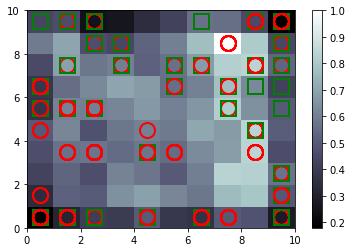

In [16]:

# visualizing the results

from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5, w[1]+0.5,
  markers[y[i]],
  markeredgecolor = colors[y[i]],
  markerfacecolor = 'None',
  markersize = 15,
  markeredgewidth = 2)

show()
#Create a pseudocolor plot with a non-regular rectangular grid
#Data Similarity
# Getting the Best Matching Unit is done by running through all wright vectors and calculating 
# the distance from each weight to the sample vector. The weight with the shortest distance is the winner.

In [17]:
#finding the frauds
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(2,
              5): [array([ 0.68536293,  1.        , -0.74947368, -0.18142857,  0.        ,
                     -0.53846154, -0.25      , -0.88877193, -1.        , -1.        ,
                     -1.        ,  1.        ,  0.        , -0.9       , -0.97576   ]), array([-0.38156962,  1.        , -0.11518797, -0.64285714,  0.        ,
                     -0.69230769,  0.        , -0.84210526, -1.        , -1.        ,
                     -1.        ,  1.        ,  0.        , -0.859     , -1.        ]), array([ 0.62240669,  1.        , -0.64421053, -0.97607143,  0.        ,
                     -0.53846154,  0.75      , -0.75438596, -1.        , -1.        ,
                     -1.        ,  1.        ,  0.        , -0.66      , -1.        ]), array([ 0.00154968,  1.        , -0.57894737, -0.90785714,  0.        ,
                     -0.53846154,  0.75      , -0.98245614, -1.        , -1.        ,
                     -1.        ,  1.        , -1.

In [18]:
data.columns

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

In [19]:

# feature scaling

customers = data.iloc[:,1:].values
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

customers = sc.fit_transform(customers)
customers

array([[ 0.68873723, -0.80105183,  1.34711063, ..., -0.48835847,
         0.03738039, -0.89530251],
       [-1.45193254, -0.75124044,  0.45054795, ..., -0.13959116,
        -0.19541334, -0.89530251],
       [-1.45193254, -0.16785619, -0.60482292, ...,  0.55794344,
        -0.19541334, -0.89530251],
       ...,
       [-1.45193254, -1.07543661,  0.96114643, ..., -0.48835847,
        -0.19541334,  1.11694091],
       [-1.45193254, -0.35021653,  1.95822062, ..., -0.3721027 ,
        -0.19330052,  1.11694091],
       [ 0.68873723,  0.79628971, -0.94857229, ...,  2.18552419,
        -0.19541334,  1.11694091]])

In [23]:
frauds=[mappings[(2,4)],mappings[(7,4)]]
frauds

[[], []]

In [24]:
frauds = mm.inverse_transform(frauds)

ValueError: Found array with 0 feature(s) (shape=(2, 0)) while a minimum of 1 is required.

In [27]:
# creating the dependent variable
is_fraud = np.zeros(len(data))

for i in range(len(data)):
    if data.iloc[i,0] in frauds :
        is_fraud[i] = 1

C:\Users\Admin\anaconda3\envs\tensoraksh\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """


In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.layers import Dense
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(Dense(units = 8, init = 'uniform', activation = 'relu', input_dim = 15))
model.add(Dense(units = 1, init = 'uniform', activation = 'sigmoid',))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(customers, is_fraud, batch_size = 10, epochs = 2)

C:\Users\Admin\anaconda3\envs\tensoraksh\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8, activation="relu", input_dim=15, kernel_initializer="uniform")`
  
C:\Users\Admin\anaconda3\envs\tensoraksh\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/2
690/690 [==============================] - 0s 672us/step - loss: 0.6540 - accuracy: 0.9913
Epoch 2/2
690/690 [==============================] - 0s 93us/step - loss: 0.5255 - accuracy: 1.0000


In [29]:
# predicting the test set results

y_pred = model.predict(customers)
y_pred = np.concatenate((data.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:,1].argsort()]

In [30]:
y_pred

array([[1.56546250e+07, 2.17726514e-01],
       [1.56114090e+07, 2.19135940e-01],
       [1.56232100e+07, 2.20761552e-01],
       ...,
       [1.57881310e+07, 4.38071400e-01],
       [1.56647930e+07, 4.40545291e-01],
       [1.57901130e+07, 4.58153248e-01]])